<a href="https://colab.research.google.com/github/iamritikiit/DeepLearning/blob/main/Assignment_1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt

Data

In [31]:
def f(x):
  return np.exp(-np.sin(x**2)/2) + x
X = np.linspace(-10, 10, 25).reshape(1, -1)
Y = f(X)

Train/test split

In [32]:
perm = np.random.permutation(X.shape[1])
train_idx, test_idx = perm[:20], perm[20:]
X_train, Y_train = X[:, train_idx], Y[:, train_idx]
X_test,  Y_test  = X[:, test_idx],  Y[:, test_idx]

taking tanh

In [33]:
def tanh(x):
  return np.tanh(x)
def dtanh(x):
  return 1 - np.tanh(x)**2      # derivative
g, gprime = tanh, dtanh

taknig relu function

In [34]:
# def relu(x):
#     return np.maximum(0, x)

# def drelu(x):
#     return (x > 0).astype(float)
# g, gprime = relu, drelu

Init params

In [35]:
rng = np.random.default_rng(0)
W1, b1 = rng.normal(size=(1,1)), np.zeros((1,1))
W2, b2 = rng.normal(size=(1,1)), np.zeros((1,1))
W3, b3 = rng.normal(size=(1,1)), np.zeros((1,1))

In [36]:
lr = 0.01
epochs = 10000

Training loop

In [40]:
m = X_train.shape[1]
for i in range(epochs):
    # forward
    z1 = W1 @ X_train + b1
    a1 = g(z1)
    z2 = W2 @ a1 + b2
    a2 = g(z2)
    z3 = W3 @ a2 + b3
    yhat = g(z3)

    # loss (MSE)
    loss = np.mean((yhat - Y_train)**2)

    # backward
    dz3 = 2*(yhat - Y_train) * gprime(z3) / m
    dW3 = dz3 @ a2.T
    db3 = np.sum(dz3, axis=1, keepdims=True)

    dz2 = (W3.T @ dz3) * gprime(z2)
    dW2 = dz2 @ a1.T
    db2 = np.sum(dz2, axis=1, keepdims=True)

    dz1 = (W2.T @ dz2) * gprime(z1)
    dW1 = dz1 @ X_train.T
    db1 = np.sum(dz1, axis=1, keepdims=True)

    # update
    W3 -= lr*dW3; b3 -= lr*db3
    W2 -= lr*dW2; b2 -= lr*db2
    W1 -= lr*dW1; b1 -= lr*db1

    if i % 2000 == 0:
        print(f"Epoch {i}: loss {loss:.4f}")


Epoch 0: loss 22.7106
Epoch 2000: loss 22.7101
Epoch 4000: loss 22.7098
Epoch 6000: loss 22.7096
Epoch 8000: loss 22.7094


Evaluation

In [41]:
def predict(X):
    a1 = g(W1 @ X + b1)
    a2 = g(W2 @ a1 + b2)
    return g(W3 @ a2 + b3)
train_pred = predict(X_train)
test_pred  = predict(X_test)
print("Train MSE:", np.mean((train_pred - Y_train)**2))
print("Test  MSE:", np.mean((test_pred  - Y_test )**2))

Train MSE: 22.70930785727114
Test  MSE: 48.074199046720665


Plot

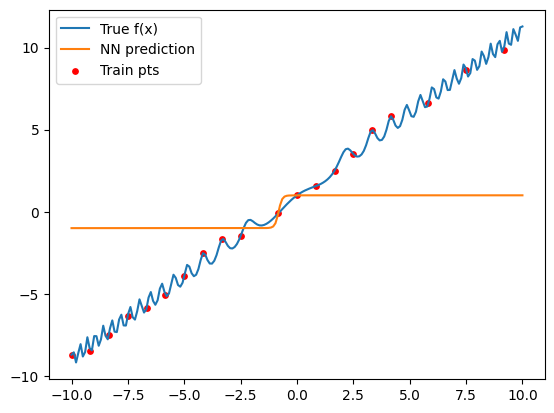

In [42]:
xs = np.linspace(-10,10,200).reshape(1,-1)
plt.plot(xs.flatten(), f(xs).flatten(), label="True f(x)")
plt.plot(xs.flatten(), predict(xs).flatten(), label="NN prediction")
plt.scatter(X_train, Y_train, color='red', s=15, label="Train pts")
plt.legend(); plt.show()